In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

sns.set()

In [3]:
galaxy = pd.read_excel("data\galaxy.xlsx")
galaxy.describe()

,east.west,north.south,angle,radial.position,velocity
count,323.000000,323.000000,323.000000,323.000000,323.000000
mean,-0.332369,1.521089,80.890093,-0.842724,1593.625387
std,12.027505,22.887763,38.244305,25.888799,94.268114
min,-29.666929,-49.107689,12.500000,-52.400002,1409.000000
25%,-7.916875,-13.554341,63.500000,-21.350000,1523.000000
50%,-0.064932,0.670963,92.500000,-0.800000,1586.000000
75%,6.950529,18.013731,102.500000,19.650000,1669.000000
max,29.484140,49.888725,133.000000,55.699999,1775.000000


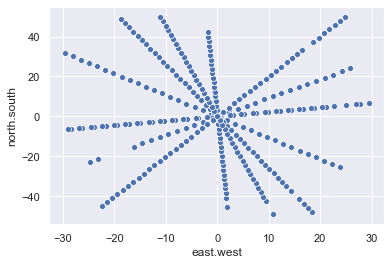

In [4]:
sns.scatterplot(x="east.west", y="north.south", data=galaxy)

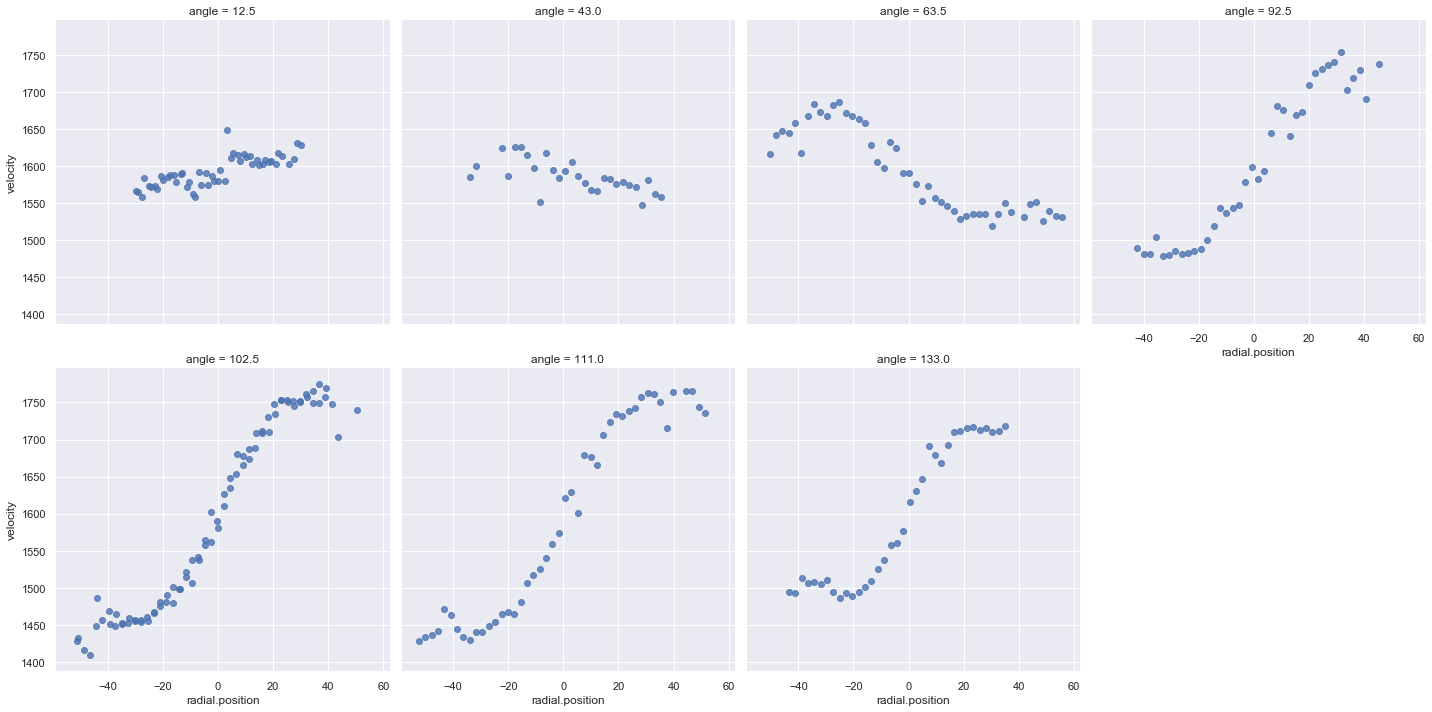

In [7]:
sns.lmplot(
    x="radial.position",
    y="velocity",
    data=galaxy,
    col="angle",
    fit_reg=False,
    col_wrap=4,
)

In [14]:
galaxy_plot_df = pd.read_excel("data/galaxy_loess_fit.xlsx")
galaxy_plot_df.head()

,east_west,north_south,fitted
0,-25.0,-45.0,1603.075672
1,-24.5,-45.0,1606.720825
2,-24.0,-45.0,1610.321331
3,-23.5,-45.0,1613.877147
4,-23.0,-45.0,1617.388233


#### Contour plots

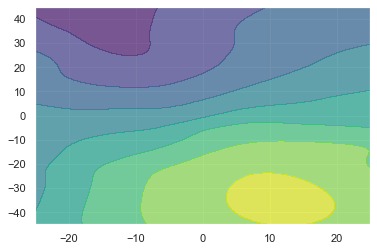

In [43]:
galaxy_contour = galaxy_plot_df.pivot("east_west", "north_south")
X = galaxy_contour.columns.levels[1].values
Y = galaxy_contour.index.values
Z = galaxy_contour.values
Xi, Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.viridis)
;

#### 2D density plots

In [45]:
geyser = pd.read_excel("data/geyser.xlsx")
geyser.describe()

,waiting,duration
count,299.000000,299.000000
mean,72.314381,3.460814
std,13.890324,1.147904
min,43.000000,0.833333
25%,59.000000,2.000000
50%,76.000000,4.000000
75%,83.000000,4.383333
max,108.000000,5.450000


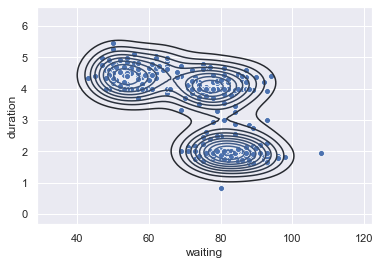

In [52]:
sns.scatterplot(data=geyser, x="waiting", y="duration")
sns.kdeplot(geyser.waiting, geyser.duration)

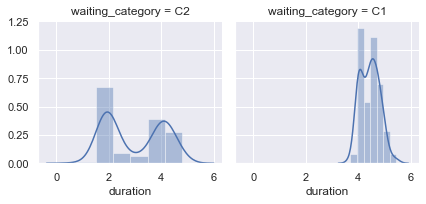

In [55]:
def set_value(curr_row_value):
    if 45 < curr_row_value <= 65:
        return 'C1'
    elif 65 < curr_row_value <= 110:
        return 'C2'
    else:
        return 'C3'

# .apply will be called for every row and set_value function will be applied
geyser["waiting_category"] = geyser["waiting"].apply(set_value)
g = sns.FacetGrid(data=geyser[geyser['waiting_category'] != 'C3'], col="waiting_category")
g.map(sns.distplot, "duration")

In [56]:
galaxy_grid = pd.read_excel("data/galaxy_grid.xlsx")
galaxy_grid.describe()

,east.west,north.south,fit
count,1196.000000,1196.000000,1196.000000
mean,0.000000,0.000000,1598.361528
std,15.006275,26.562943,98.745440
min,-25.000000,-45.000000,1430.568407
25%,-13.000000,-23.000000,1515.517993
50%,0.000000,0.000000,1590.025586
75%,13.000000,23.000000,1690.779455
max,25.000000,45.000000,1762.853895


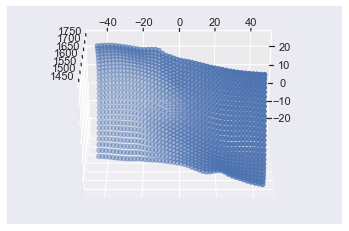

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = galaxy_grid['east.west']
ys = galaxy_grid['north.south']
zs = galaxy_grid['fit']
ax.scatter(xs, ys, zs)
ax.view_init(-60, 0)

In [68]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()